# IBM HR Analytics Employee Attrition & Performance

Regarding the data on employee features and rating data was obtained from a fictional data set created by IBM data scientists published on Kaggle. The primary application is to reveal the factors that contribute to employee turnover and to explore the impact that multiple factors have on employee performance.

Dataset: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

## The Data
The data has 1470 observations on the following 35 variables.


# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
# import plotly.express as px #new
# import plotly.graph_objs as go #new
# import plotly.tools as tls #new
# import plotly.offline as py #new
# import plotly.figure_factory as ff #new
# py.init_notebook_mode(connected=True) #new
from sklearn import datasets
from sklearn.metrics import *
from sklearn.svm import SVC
# from xgboost import XGBClassifier #new
# from catboost import CatBoostClassifier #new
from sklearn.cluster import KMeans
from scipy.stats import norm, kurtosis
from sklearn.decomposition import PCA
from scipy.stats import norm, kurtosis
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import FastICA
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

%matplotlib inline
warnings.filterwarnings('ignore') #new

# Read in the data & Basic Exploration

In [5]:
data = pd.read_csv('ibmhr.csv')
data = pd.DataFrame(data).reset_index()

data.head()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.shape

(1470, 36)

### Taking a glance at the datatypes

In [7]:
# check data columns, null count, check datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [8]:
# summary stats
data.describe()

,index,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,734.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1469.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# check the freq of data
data.describe(include=object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [10]:
# check if have null
data.isnull().sum()

index                       0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [11]:
# overall to learn the data for attrition
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
# data cleaning: Y/N convert to 1/0
# data['Attrition'] = data['Attrition'].factorize(['No','Yes'])[0]
# data.head()
# In order to display viszulazition, use it later

# Exploratory Data Analysis
piecolors: https://seaborn.pydata.org/tutorial/color_palettes.html

csshttps://matplotlib.org/3.1.0/gallery/color/named_colors.html

## Distribution of Attrition variable

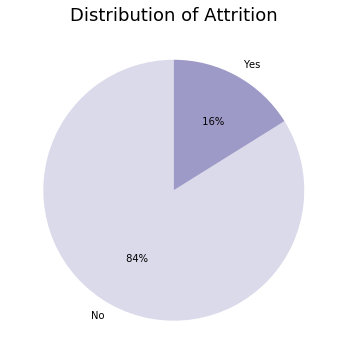

In [13]:
# Checking the target variable distribution
pie_colors = sns.color_palette("Purples",3)

attrition = data['Attrition'].value_counts().to_frame().reset_index()
attrition.columns = ['Attrition', 'Number of attrition']
attrition

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(attrition['Number of attrition'], labels = attrition['Attrition'], colors=pie_colors, autopct ='% .0f%%', startangle = 90) 
ax.set_title('Distribution of Attrition', fontsize=18)

plt.show()

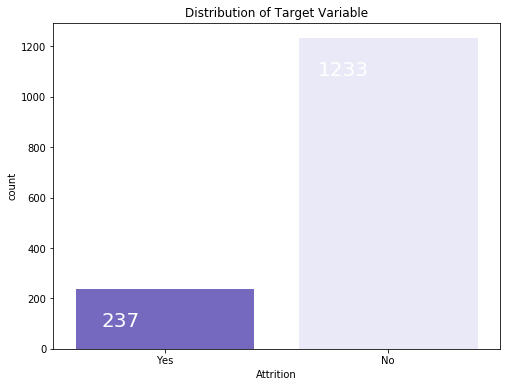

In [14]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data=data, x='Attrition', palette=["slateblue", 'lavender'])
ax.set_title('Distribution of Target Variable')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=20)

# How each variables tell us - density

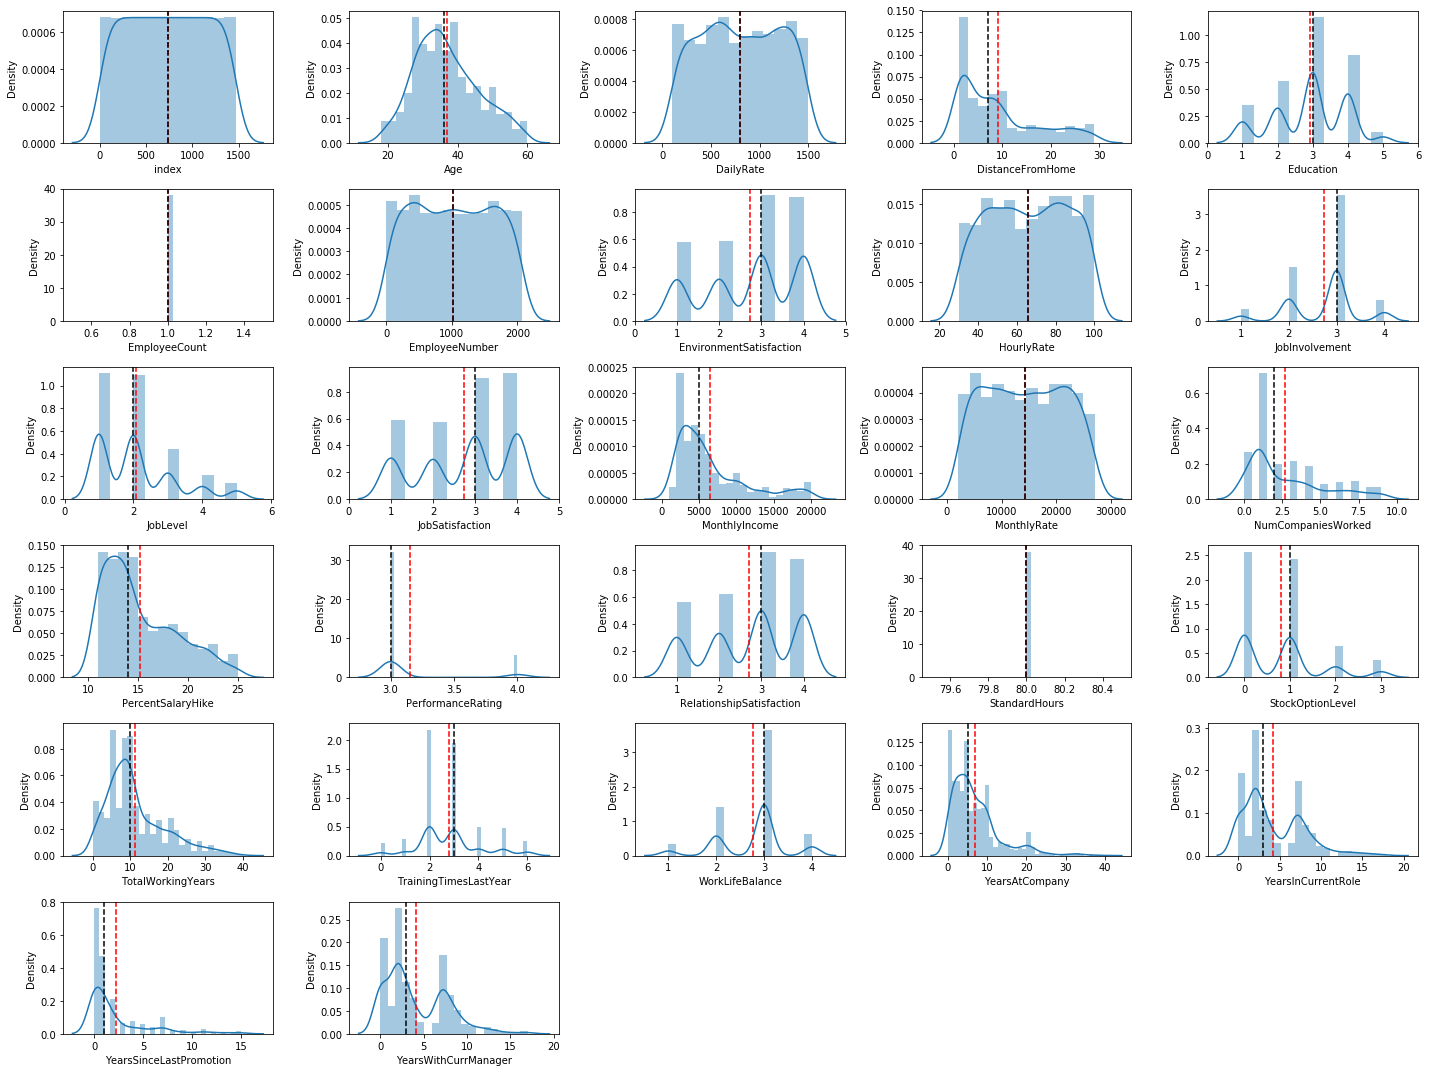

In [15]:
def make_distplot(data, col, ax):
    sns.distplot(data[col], ax = ax)
    ax.axvline(data[col].mean(), linestyle = '--', color = "red")
    ax.axvline(data[col].median(), linestyle = '--', color = "black")

numeric_columns = list(data.select_dtypes(include=np.number).columns)
categorical_columns = list(data.select_dtypes(include="object").columns)

fig, ax = plt.subplots(6,5, figsize = (20,15))

ax = np.ravel(ax)
for i in range(len(numeric_columns)):
    make_distplot(data, numeric_columns[i], ax[i])
for i in range(len(numeric_columns), 6*5):
    ax[i].axis("off")
ax = np.reshape(ax, (6, 5))
plt.tight_layout()

# How each variables tell us - count

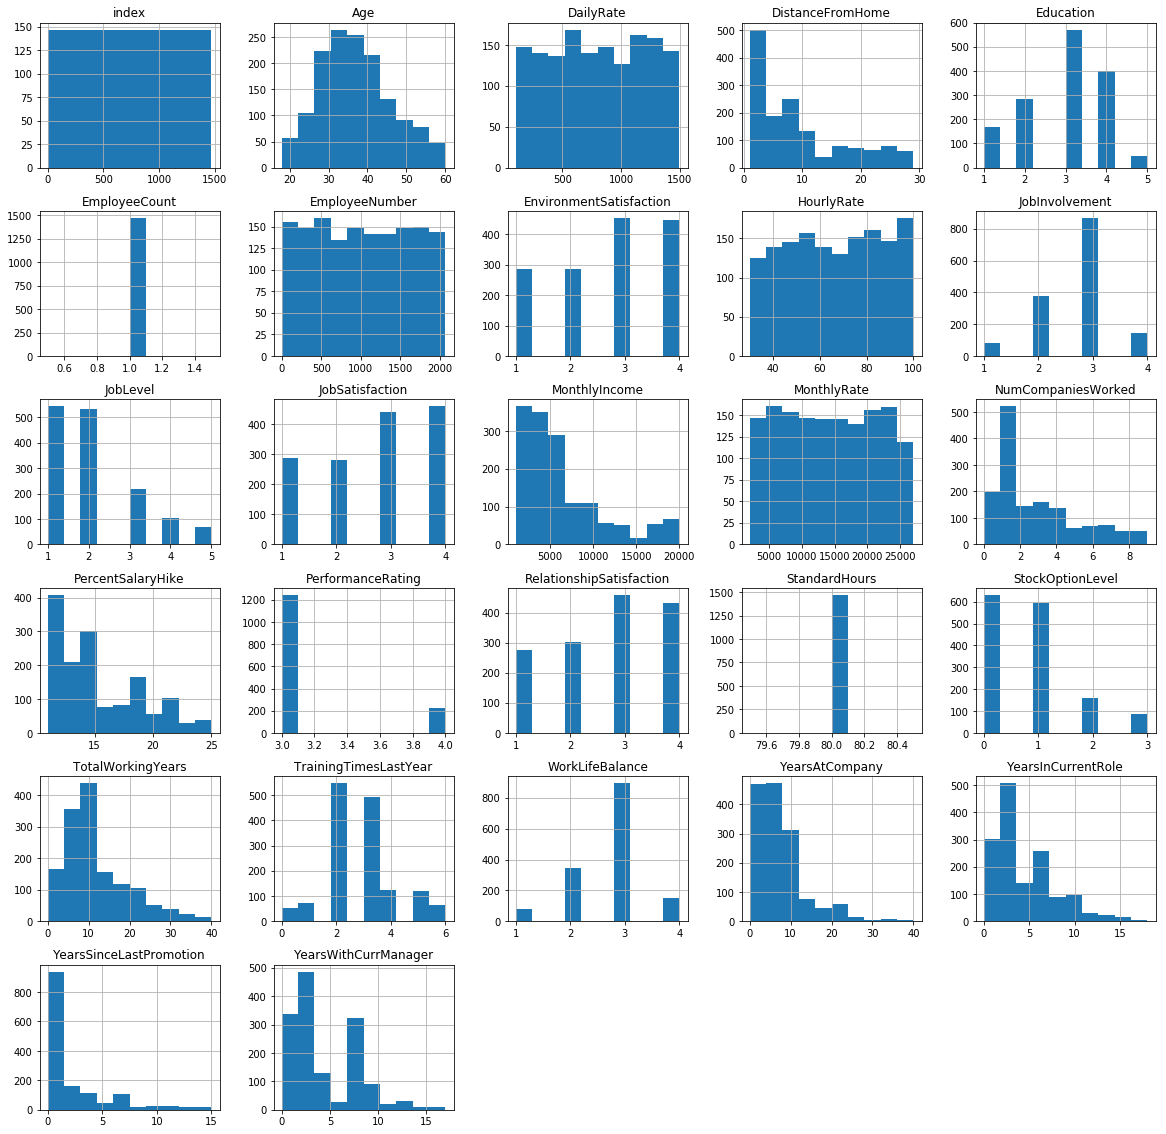

In [16]:
data.hist(figsize=(20,20))

plt.show()

## Explore the correlation between variables

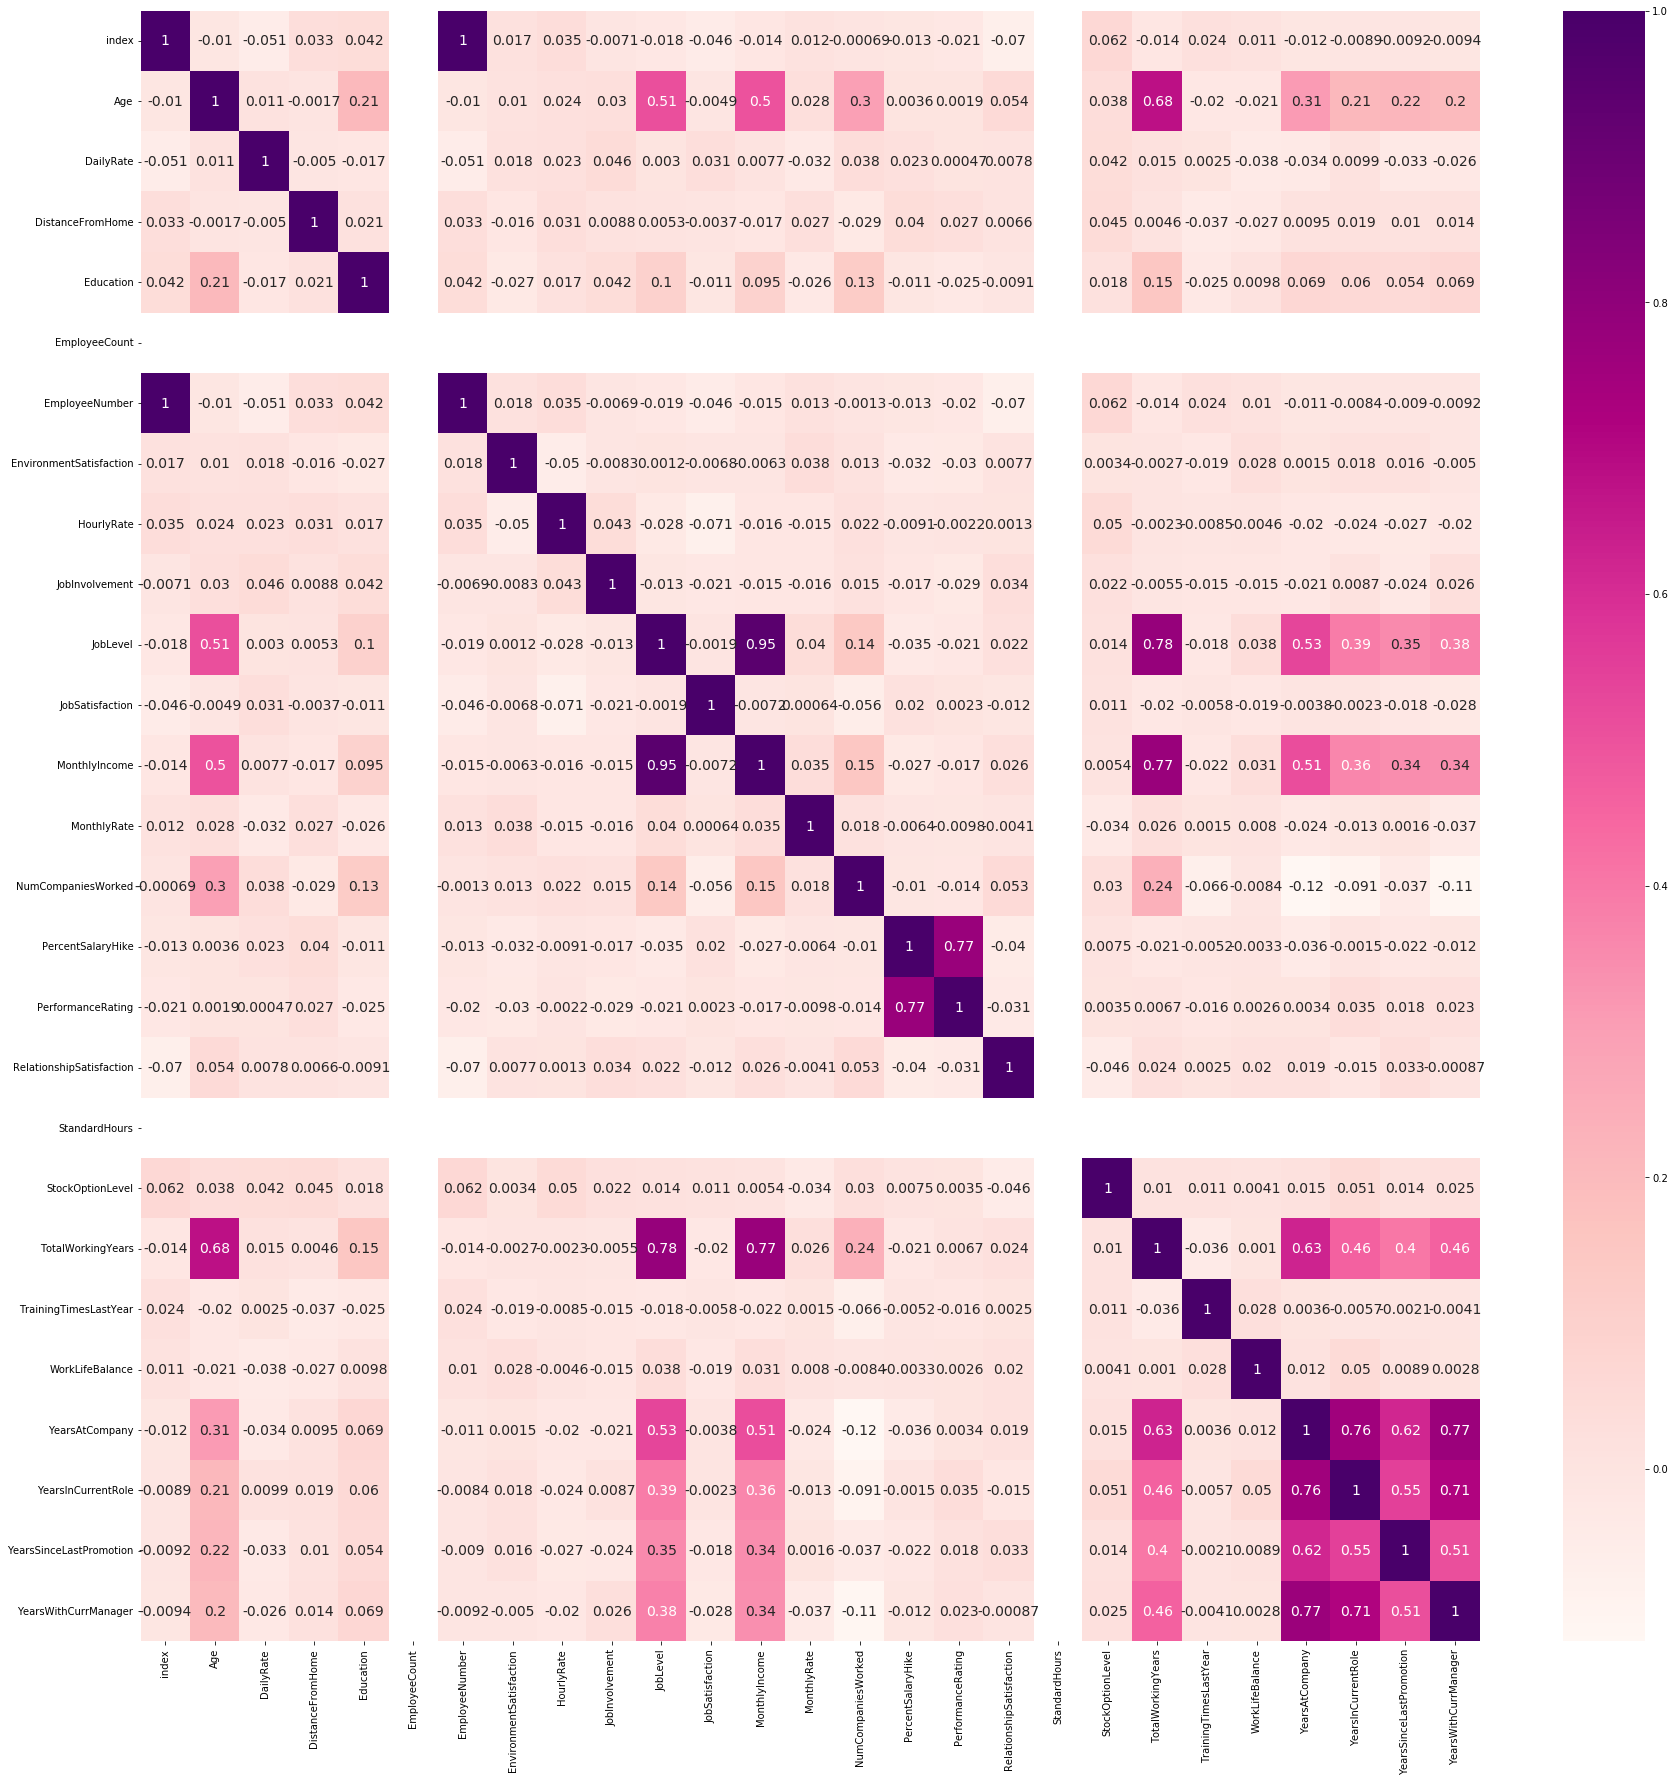

In [17]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdPu", annot_kws={"size":14})

In [18]:
# data['Attrition'] = data['Attrition'].factorize(['No','Yes'])[0]
# pairplotdata = ['Age', 'Attrition', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'MonthlyIncome', 'RelationshipSatisfaction', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']

# plot = sns.pairplot(pairplotdata, hue = 'Attrition', palette = 'copper_r')

# plot.fig.suptitle('Feature Relationship', y = 1.05, weight = 'bold', fontsize =16)

# EDA

# AGE

### Distribution

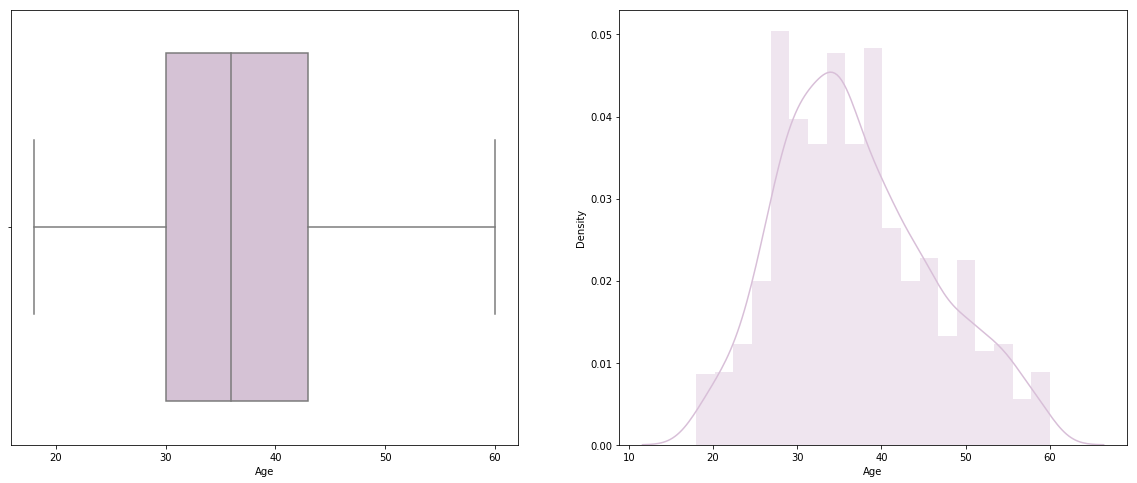

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(ax = axes[0],color ='thistle', x = data['Age'])
sns.distplot(data["Age"], color ='thistle')

### How is Attrition Affected by Age?

Text(0.5, 1.0, 'Employee Attrition by Age')

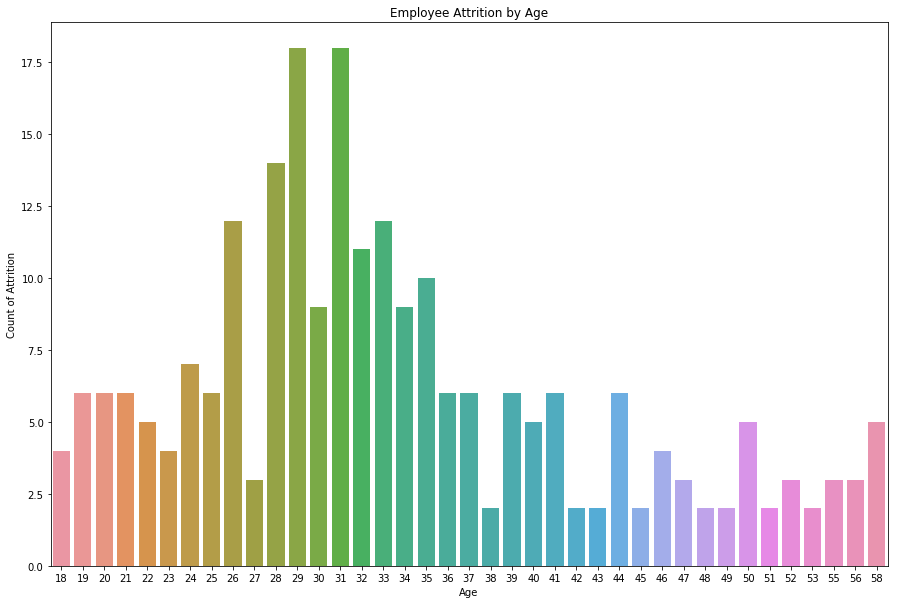

In [20]:
aa = data[['Age', 'Attrition']]
aa_y = aa[aa.Attrition == 'Yes']
age_y = aa_y['Age'].value_counts().to_frame().reset_index()
age_y.columns = ['Age', 'Count of Attrition']
age = pd.DataFrame(age_y).reset_index()
plt.figure(figsize=(15,10))
age = sns.barplot(x='Age', y='Count of Attrition', data=age, estimator=np.max)
age.set_title('Employee Attrition by Age')
# That looks wried on age 30, so we tried other plot to makes sense.

Attrition employees: median age = 32 years old and standard deviation = 9.7
Active employees: median age = 36 years old and standard deviation = 8.9


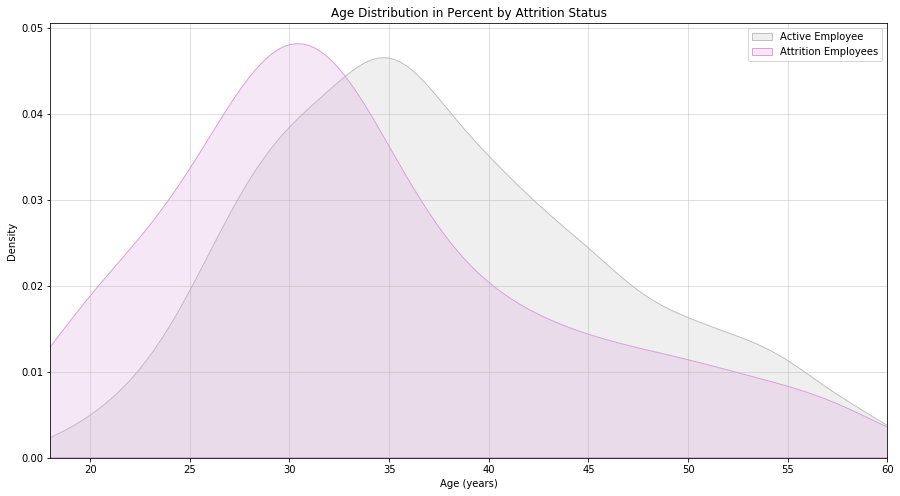

In [21]:
plt.figure(figsize=(15,8))
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'Age'], label = 'Active Employee', color='silver',shade=True)
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'Age'], label = 'Attrition Employees', color='plum',shade=True)
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent by Attrition Status');
print('Attrition employees: median age = {:.0f} years old and standard deviation = {:.1f}'.format(data[data['Attrition']=='Yes']['Age'].median(), data[data['Attrition']=='Yes']['Age'].std()))
print('Active employees: median age = {:.0f} years old and standard deviation = {:.1f}'.format(data[data['Attrition']=='No']['Age'].median(), data[data['Attrition']=='No']['Age'].std()))

# Gender

### Gender Distribution of Employee Attrition

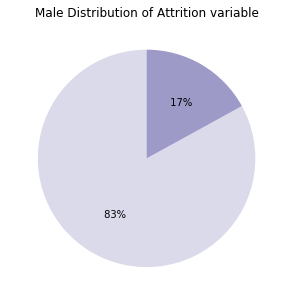

In [22]:
gender = data[['Gender', 'Attrition']]
gender_m = data[data.Gender == 'Male']
gender_f = data[data.Gender == 'Female']

m_attrition = gender_m['Attrition'].value_counts().to_frame().reset_index()
m_attrition.columns = ['Attrition', 'Number of attrition_M']
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(m_attrition['Number of attrition_M'], colors=pie_colors, autopct ='% .0f%%', startangle = 90) 
ax.set_title('Male Distribution of Attrition variable')
plt.show()

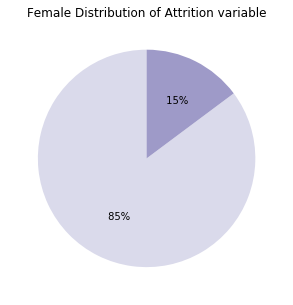

In [23]:
f_attrition = gender_f['Attrition'].value_counts().to_frame().reset_index()
f_attrition.columns = ['Attrition', 'Number of attrition_M']

fig, ax = plt.subplots(figsize=(5,5))
ax.pie(f_attrition['Number of attrition_M'], colors=pie_colors, autopct ='% .0f%%', startangle = 90) 
ax.set_title('Female Distribution of Attrition variable')

plt.show()

# Business Travels

### How is Attrition Affected by Business Travels?

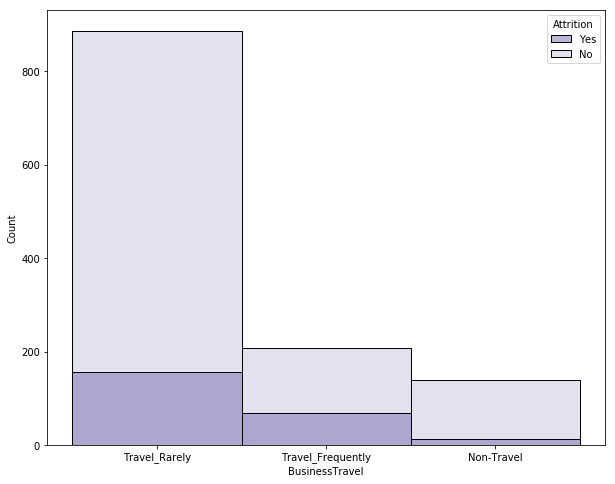

In [24]:
plt.figure(figsize=(10,8))
sns.histplot(x='BusinessTravel', palette="Purples_r", hue='Attrition', data=data)

# OverTime

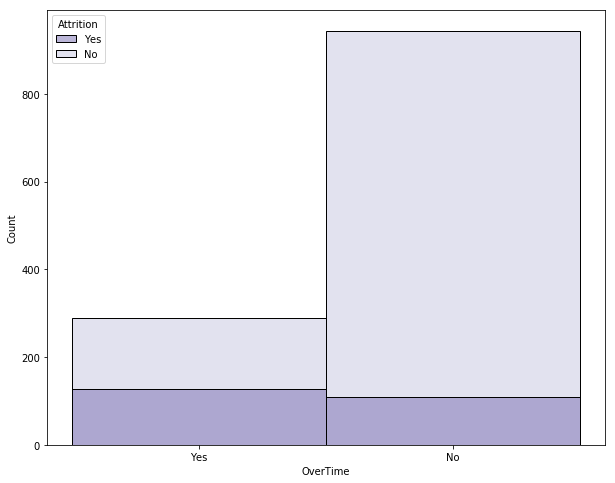

In [25]:
plt.figure(figsize=(10,8))
sns.histplot(x='OverTime', palette="Purples_r", hue='Attrition', data=data)

# Work-Life Balance

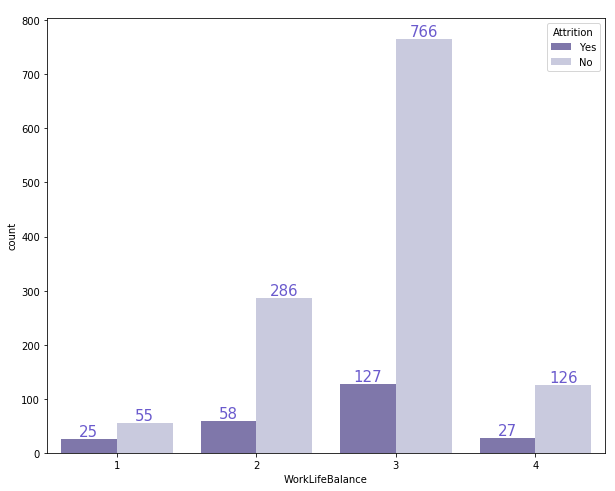

In [26]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='WorkLifeBalance', hue='Attrition', data=data, palette="Purples_r")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='slateblue', size=15)

# Daily Rate

### Distribution

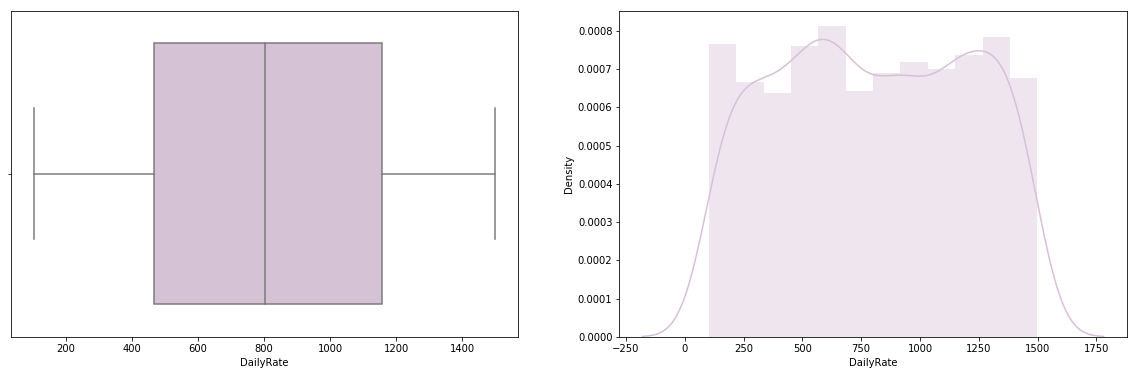

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax = axes[0],color ='thistle',x = data['DailyRate'])
sns.distplot(ax = axes[1],color ='thistle',a = data['DailyRate'])

### How is Attrition Affected by Daily Rate?

Attrition employees: median DailyRate = 32.00 and standard deviation = 401.90
Active employees: median DailyRate = 36.00 and standard deviation = 403.2


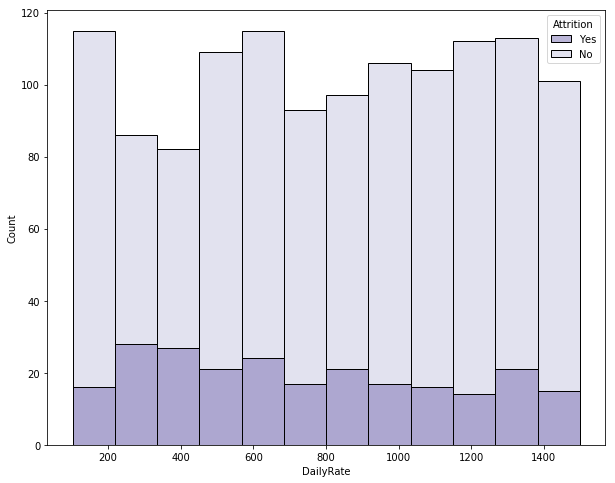

In [28]:
plt.figure(figsize=(10,8))
ax = sns.histplot(x='DailyRate', palette="Purples_r", hue='Attrition', data=data)
print('Attrition employees: median DailyRate = {:.2f} and standard deviation = {:.2f}'.format(data[data['Attrition']=='Yes']['Age'].median(), data[data['Attrition']=='Yes']['DailyRate'].std()))
print('Active employees: median DailyRate = {:.2f} and standard deviation = {:.1f}'.format(data[data['Attrition']=='No']['Age'].median(), data[data['Attrition']=='No']['DailyRate'].std()))

# Department

### Distribution

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

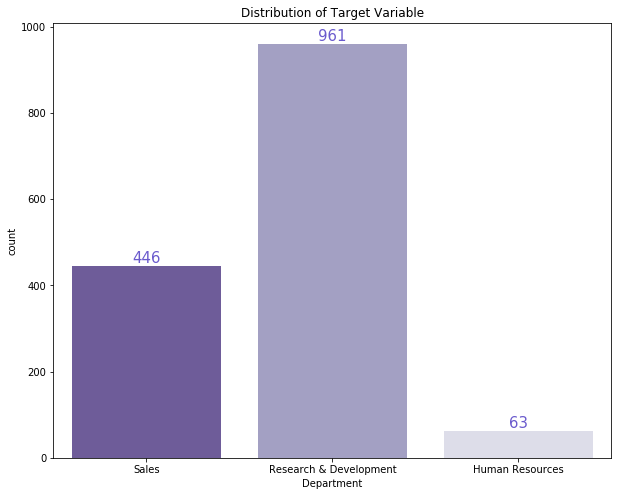

In [29]:
plt.figure(figsize = (10,8))
ax = sns.countplot(data=data, x='Department', palette="Purples_r")
ax.set_title('Distribution of Target Variable')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='slateblue', size=15)

data['Department'].value_counts()

### How is Attrition Affected by Department?

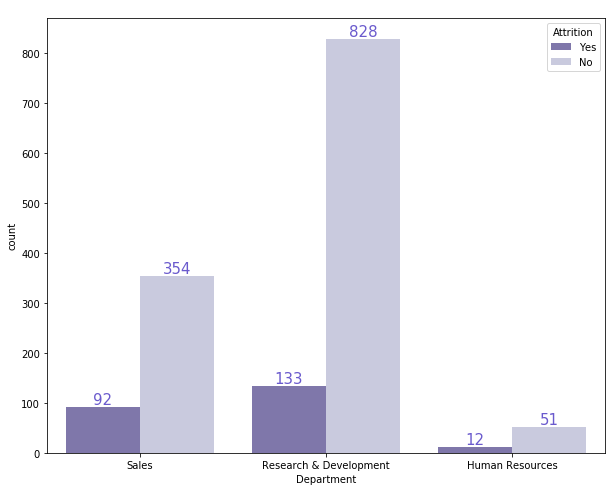

In [30]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Department', hue='Attrition', data=data, palette="Purples_r")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='slateblue', size=15)

# Distance From Home

### Distribution

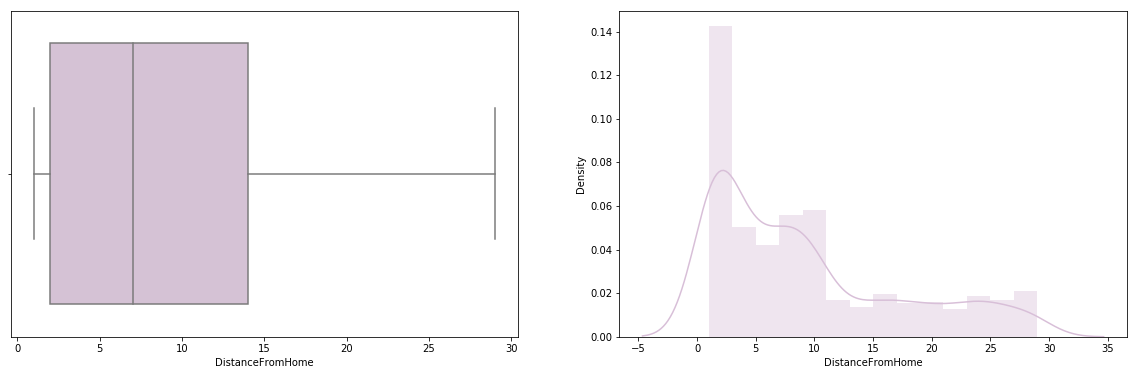

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax = axes[0], color ='thistle', x = data['DistanceFromHome'])
sns.distplot(ax = axes[1], color ='thistle',a = data["DistanceFromHome"])

### How is Attrition Affected by Distance From Home?

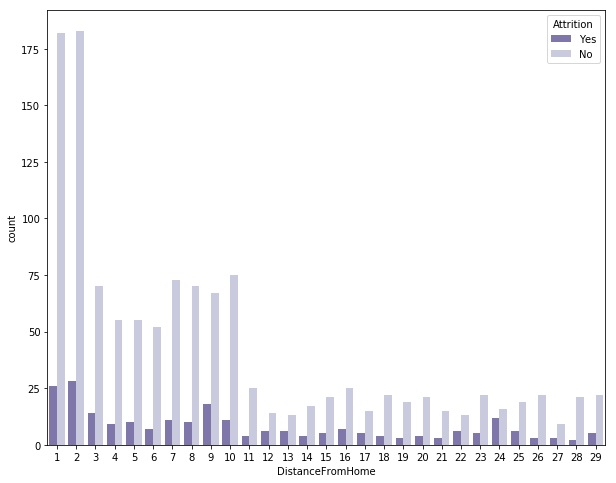

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=data, palette="Purples_r")

### Distribution

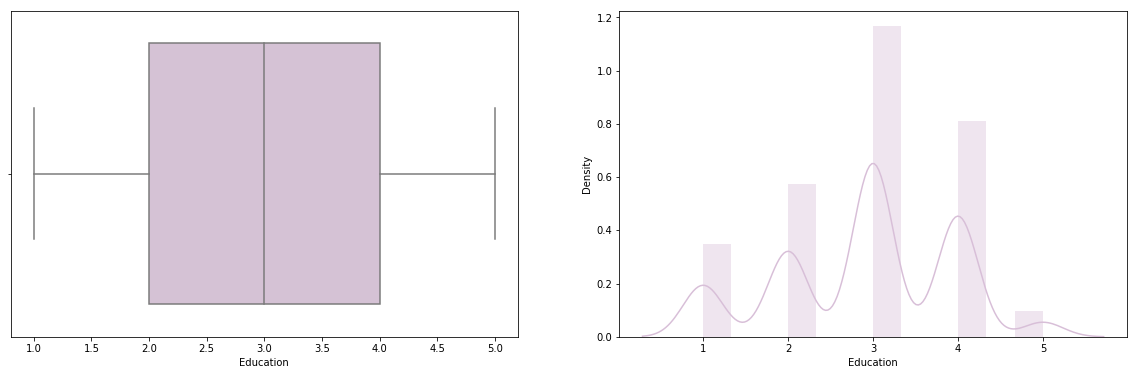

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax = axes[0], color ='thistle', x = data['Education'])
sns.distplot(ax = axes[1], color ='thistle',a = data["Education"])

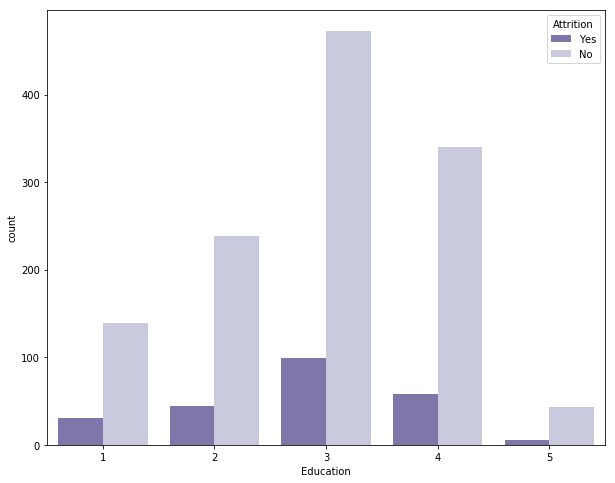

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x='Education', hue='Attrition', data=data, palette="Purples_r")

# Education Field

### Distribution

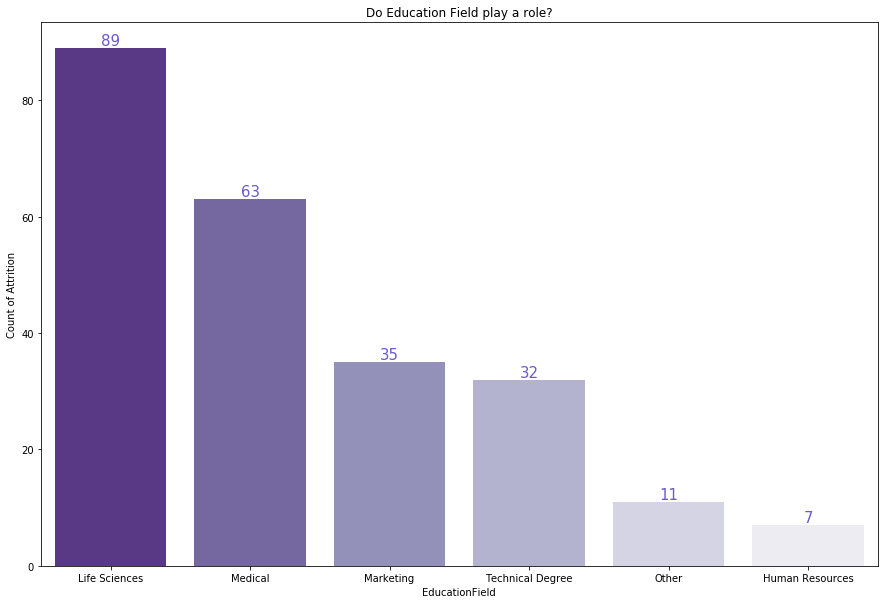

In [353]:
ef2 = data[['EducationField', 'Attrition']]
ef = ef2[ef2.Attrition == 'Yes']
ef = ef['EducationField'].value_counts().to_frame().reset_index()
ef.columns = ['EducationField', 'Count of Attrition']
ef = pd.DataFrame(ef).reset_index()
plt.figure(figsize=(15,10))
ax = sns.barplot(x='EducationField', y='Count of Attrition', palette="Purples_r", data=ef, estimator=np.max)
ax.set_title('Do Education Field play a role?')
data['EducationField'].value_counts()

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='slateblue', size=15)

### How is Attrition Affected by Education Field?

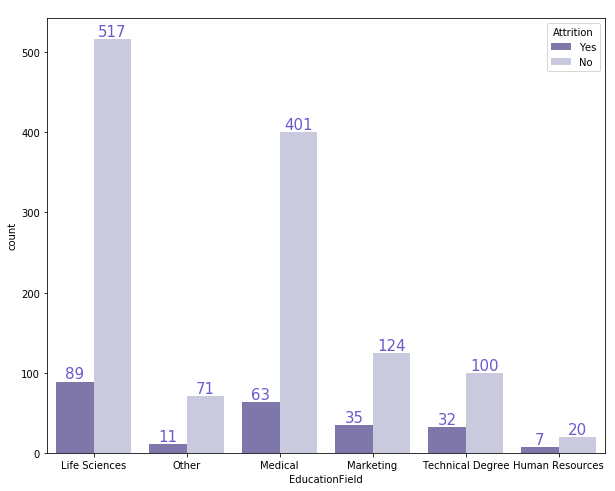

In [356]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='EducationField', hue='Attrition', palette="Purples_r", data=data)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='slateblue', size=15)

# Environment Satisfaction

### Distribution

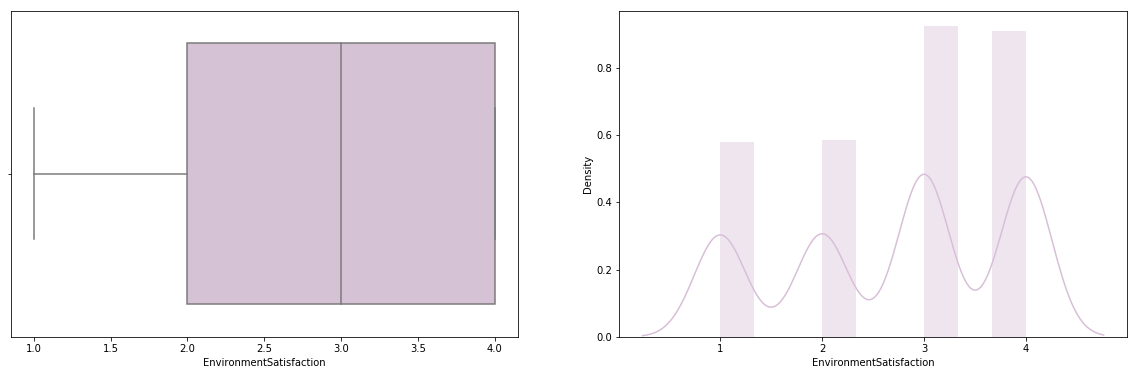

In [358]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax = axes[0],color ='thistle',x = data['EnvironmentSatisfaction'])
sns.distplot(ax = axes[1],color ='thistle',a = data['EnvironmentSatisfaction'])

# Satisfaction: Job, Relationship, Environment

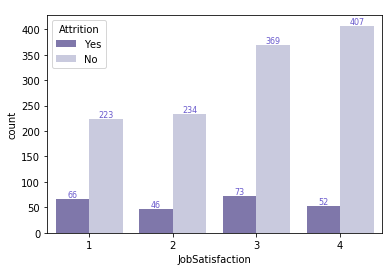

In [151]:
ax = sns.countplot(x='JobSatisfaction', hue='Attrition', palette="Purples_r", data=data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='slateblue', size=8)

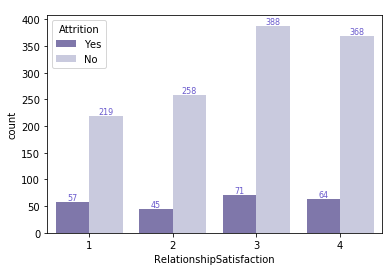

In [152]:
ax = sns.countplot(x='RelationshipSatisfaction', hue='Attrition', palette="Purples_r", data=data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='slateblue', size=8)

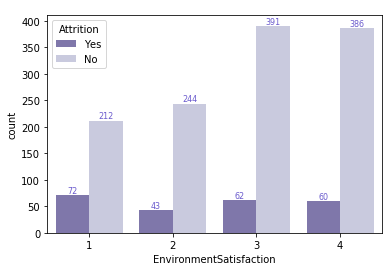

In [154]:
ax = sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', palette="Purples_r", data=data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='slateblue', size=8)

# Hourly Rate

### Distribution

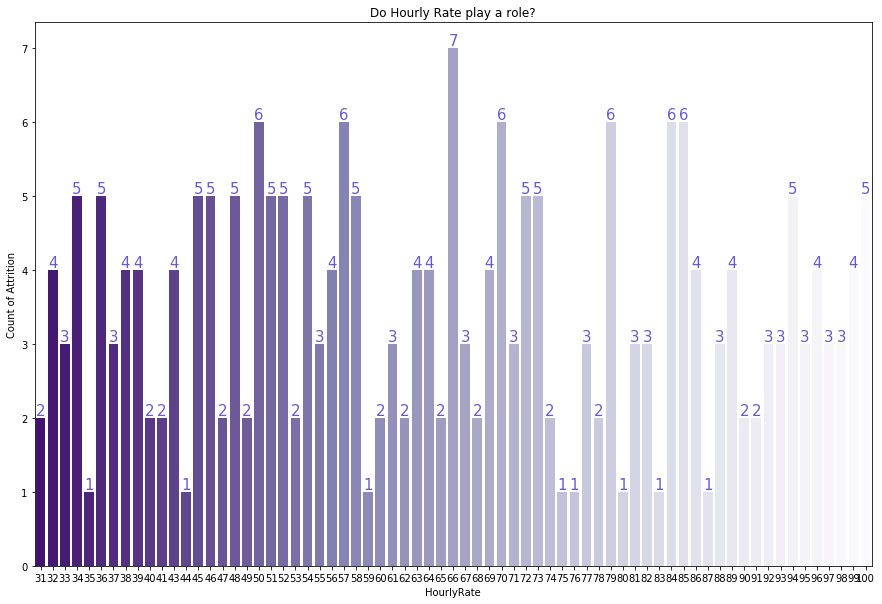

In [376]:
ef2 = data[['HourlyRate', 'Attrition']]
ef = ef2[ef2.Attrition == 'Yes']
ef = ef['HourlyRate'].value_counts().to_frame().reset_index()
ef.columns = ['HourlyRate', 'Count of Attrition']
ef = pd.DataFrame(ef).reset_index()
plt.figure(figsize=(15,10))
ax = sns.barplot(x='HourlyRate', y='Count of Attrition', palette="Purples_r", data=ef, estimator=np.max)
ax.set_title('Do Hourly Rate play a role?')
data['HourlyRate'].value_counts()

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='slateblue', size=15)

#  Monthly Income?

### Distribution

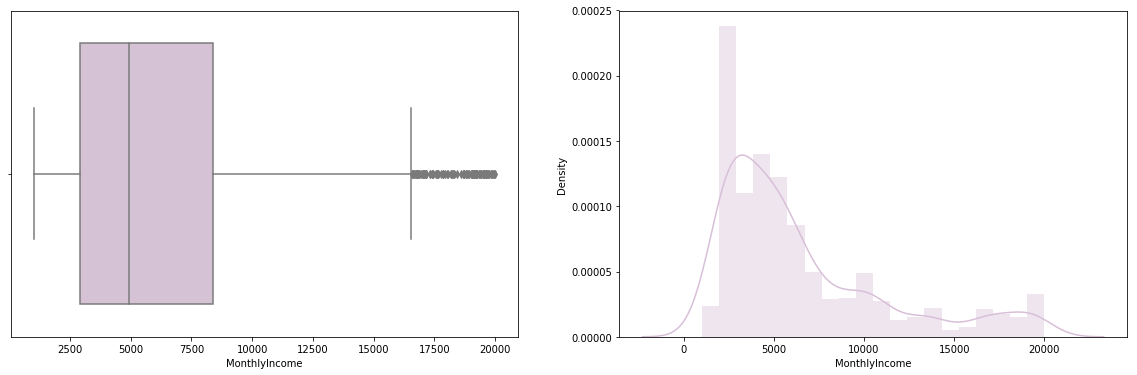

In [330]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax = axes[0],color ='thistle',x = data['MonthlyIncome'])
sns.distplot(ax = axes[1],color ='thistle',a = data["MonthlyIncome"])

In [331]:
len(data[data['MonthlyIncome']>17500])

81

In [332]:
mi1017 = data[(data['MonthlyIncome'] > 10000) & (data['MonthlyIncome'] < 17500)]
len(mi1017)

200

In [333]:
len(data[data['MonthlyIncome']<10000])

1189

In [334]:
len(data[data['MonthlyIncome']<5000])

749

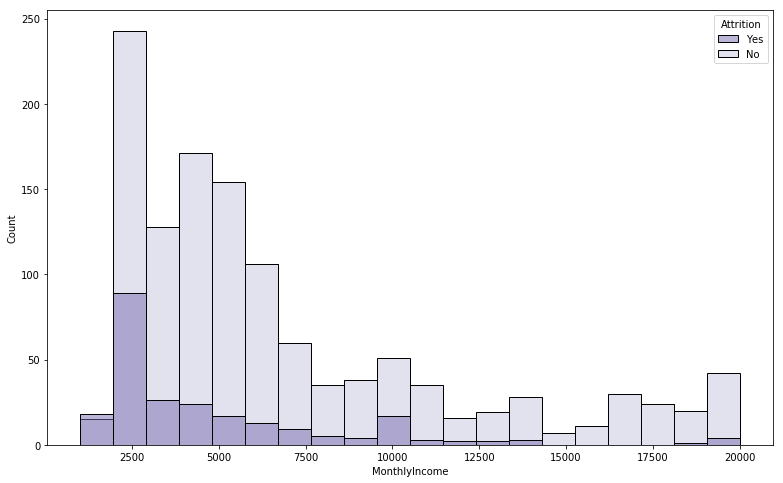

In [70]:
plt.figure(figsize=(13,8))
ax = sns.histplot(x='MonthlyIncome', palette="Purples_r", hue='Attrition', data=data)

### How is Attrition Affected by Monthly Income?

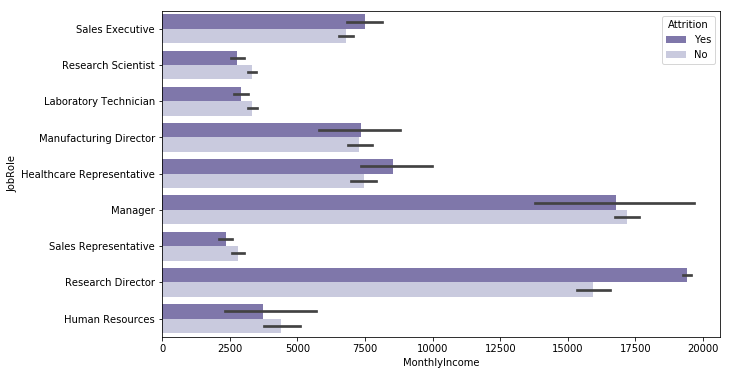

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x='MonthlyIncome', y='JobRole', palette="Purples_r",hue='Attrition', data=data)

## How is Attrition Affected by Total working years?

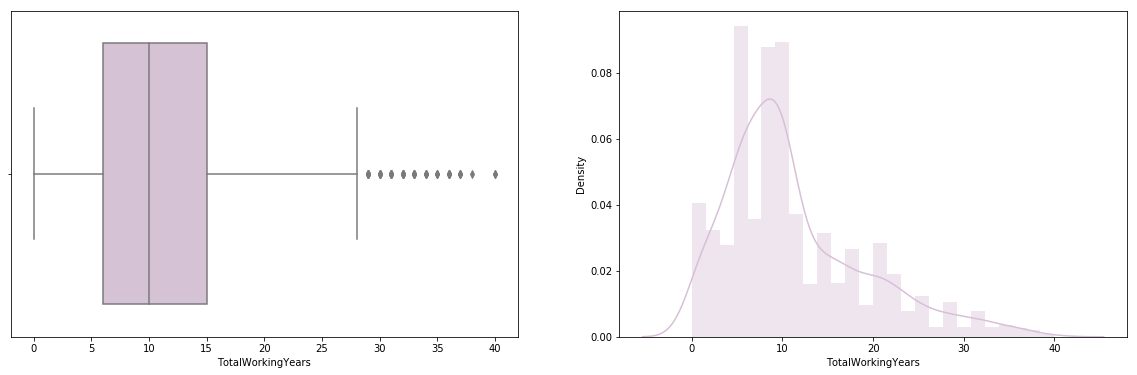

In [245]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax = axes[0], color ='thistle', x = data['TotalWorkingYears'])
sns.distplot(ax = axes[1], color ='thistle',a = data["TotalWorkingYears"])

In [246]:
len(data[data['TotalWorkingYears']>28])

63

In [247]:
twy = data[(data['TotalWorkingYears'] > 10) & (data['TotalWorkingYears'] <= 28)]
len(twy)

484

In [211]:
twy2 = data[(data['TotalWorkingYears'] >= 2) & (data['TotalWorkingYears'] <=10)]
len(twy2)

831

In [212]:
len(data[data['TotalWorkingYears']<2])

92

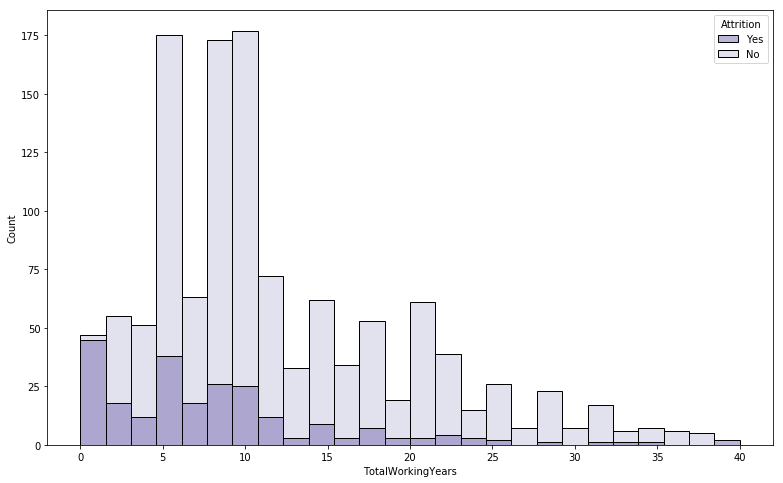

In [58]:
plt.figure(figsize=(13,8))
ax = sns.histplot(x='TotalWorkingYears', palette="Purples_r", hue='Attrition', data=data)

## How is Attrition Affected by Year at Company?

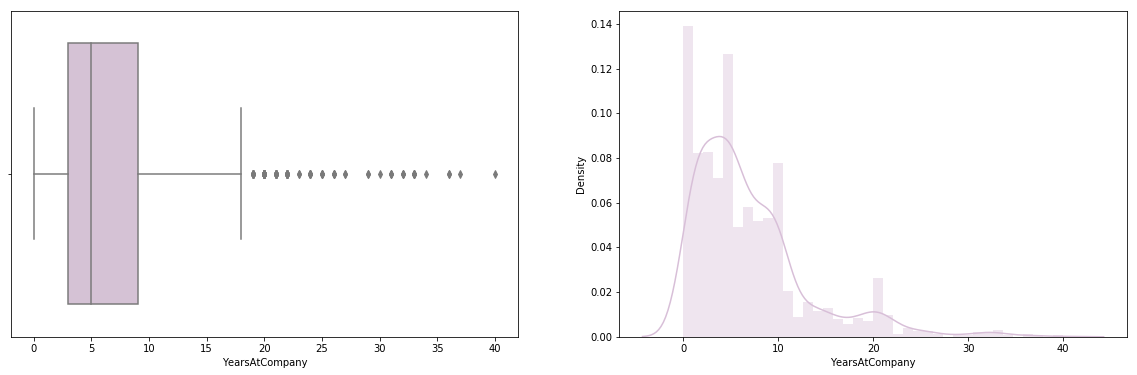

In [248]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax = axes[0], color ='thistle', x = data['YearsAtCompany'])
sns.distplot(ax = axes[1], color ='thistle',a = data["YearsAtCompany"])

In [249]:
len(data[data['YearsAtCompany']>18])

104

In [250]:
yc = data[(data['YearsAtCompany'] > 10) & (data['YearsAtCompany'] <= 18)]
len(yc)

142

In [251]:
yc2 = data[(data['YearsAtCompany'] >= 5) & (data['YearsAtCompany'] <= 10)]
len(yc2)

644

In [252]:
len(data[data['YearsAtCompany']<5])

580

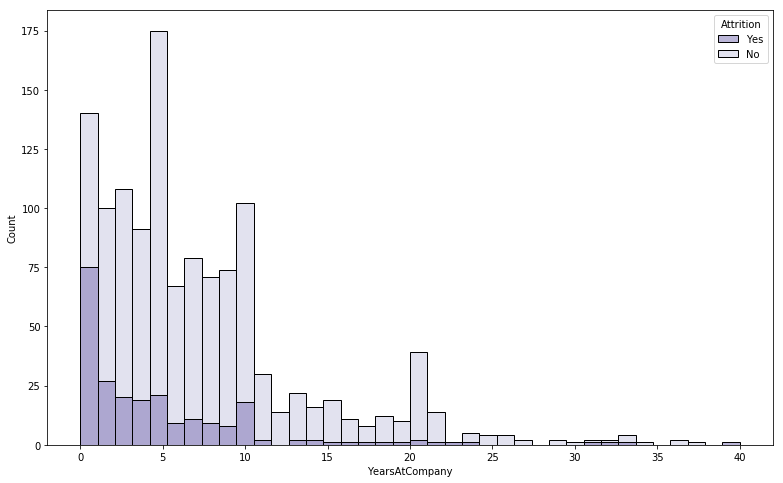

In [57]:
plt.figure(figsize=(13,8))
ax = sns.histplot(x='YearsAtCompany', palette="Purples_r", hue='Attrition', data=data)

## How is Attrition Affected by Years Since Last Promotion?

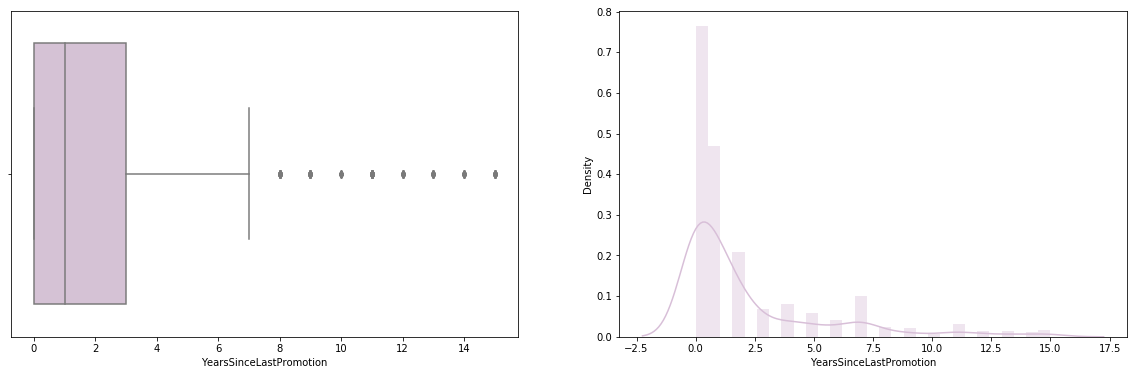

In [253]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax = axes[0], color ='thistle', x = data['YearsSinceLastPromotion'])
sns.distplot(ax = axes[1], color ='thistle',a = data["YearsSinceLastPromotion"])

In [254]:
len(data[data['YearsSinceLastPromotion']>7])

107

In [255]:
yslp = data[(data['YearsSinceLastPromotion'] >= 2) & (data['YearsSinceLastPromotion'] <= 7)]
len(yslp)

425

In [256]:
len(data[data['YearsSinceLastPromotion']<2])

938

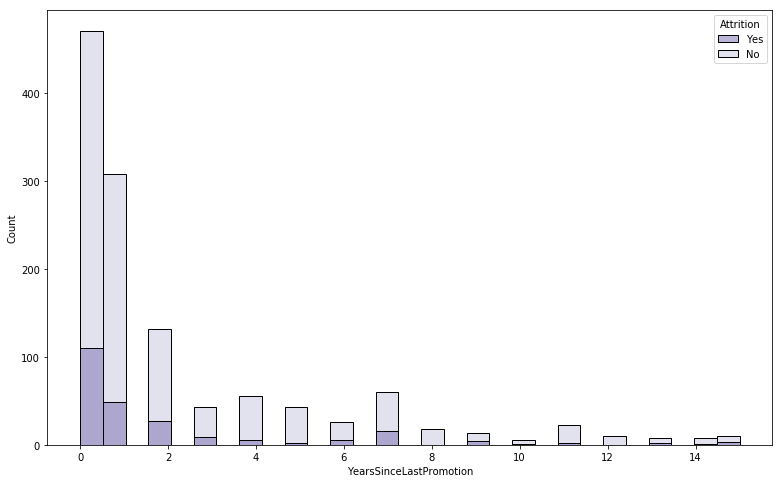

In [78]:
plt.figure(figsize=(13,8))
ax = sns.histplot(x='YearsSinceLastPromotion', palette="Purples_r", hue='Attrition', data=data)

# Num Companies worked

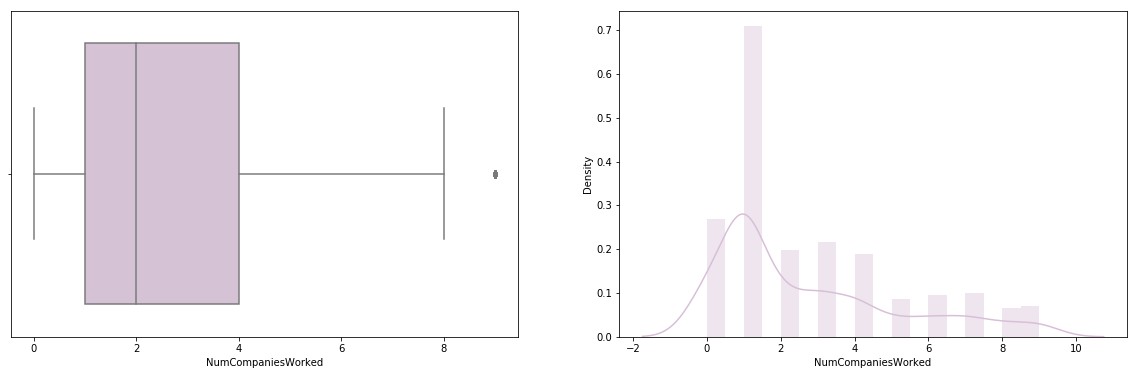

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax = axes[0], color ='thistle', x = data['NumCompaniesWorked'])
sns.distplot(ax = axes[1], color ='thistle',a = data["NumCompaniesWorked"])

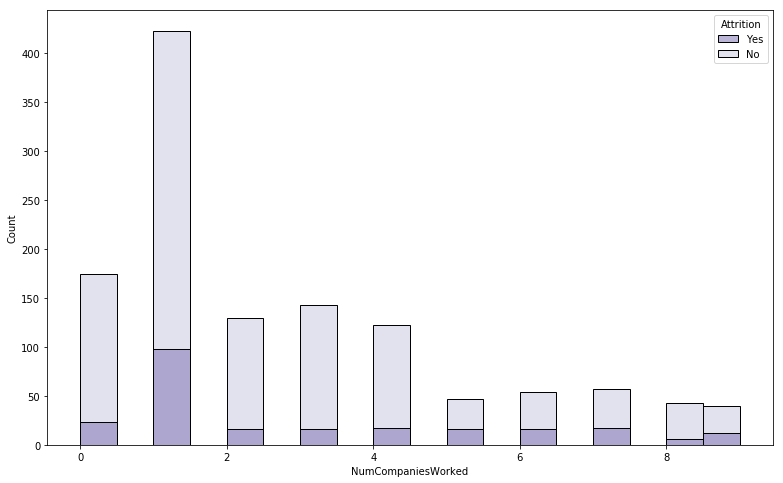

In [71]:
plt.figure(figsize=(13,8))
ax = sns.histplot(x='NumCompaniesWorked', palette="Purples_r", hue='Attrition', data=data)

# Job Level

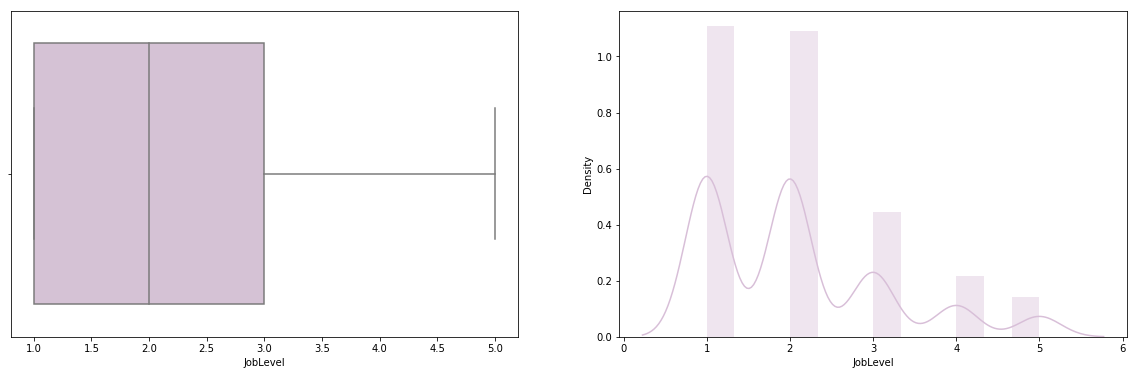

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax = axes[0], color ='thistle', x = data['JobLevel'])
sns.distplot(ax = axes[1], color ='thistle',a = data["JobLevel"])

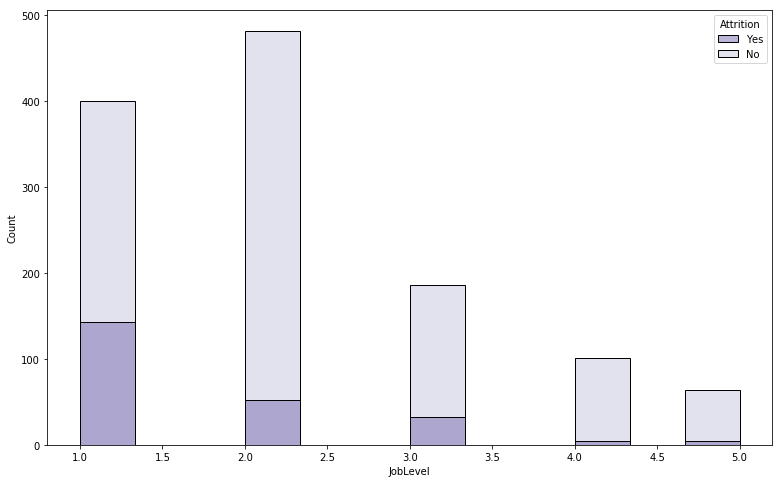

In [73]:
plt.figure(figsize=(13,8))
ax = sns.histplot(x='JobLevel', palette="Purples_r", hue='Attrition', data=data)

# WorkLifeBalance

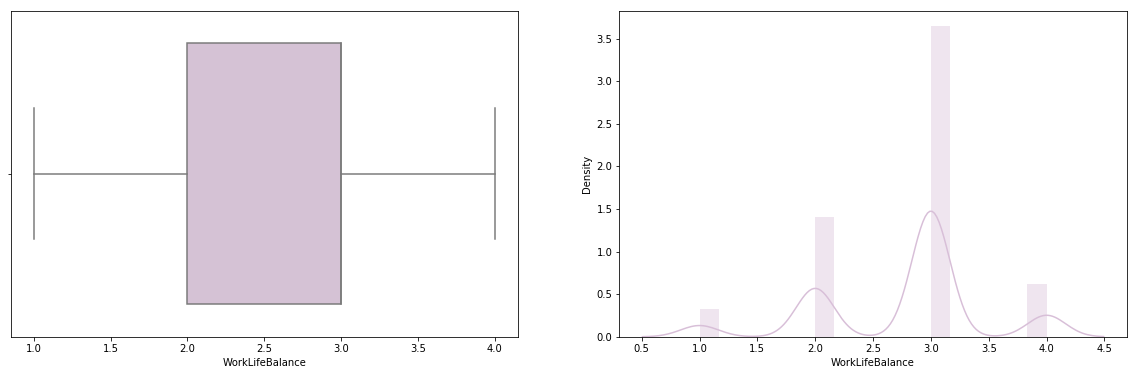

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax = axes[0], color ='thistle', x = data['WorkLifeBalance'])
sns.distplot(ax = axes[1], color ='thistle',a = data['WorkLifeBalance'])

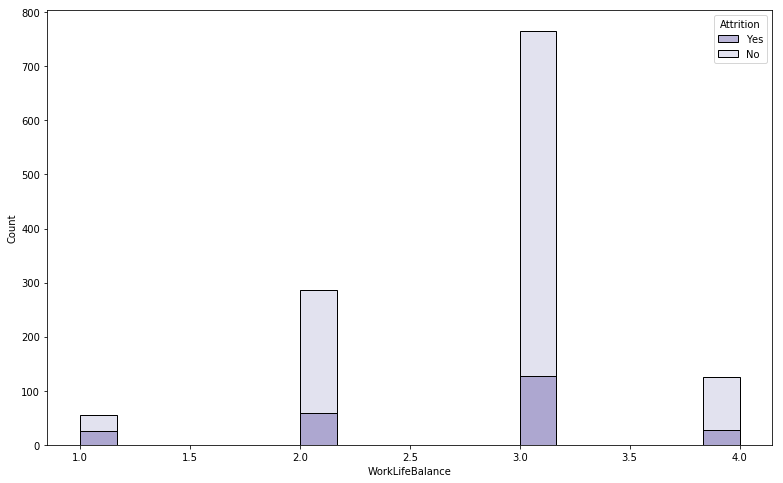

In [75]:
plt.figure(figsize=(13,8))
ax = sns.histplot(x='WorkLifeBalance', palette="Purples_r", hue='Attrition', data=data)

# JobInvolvement

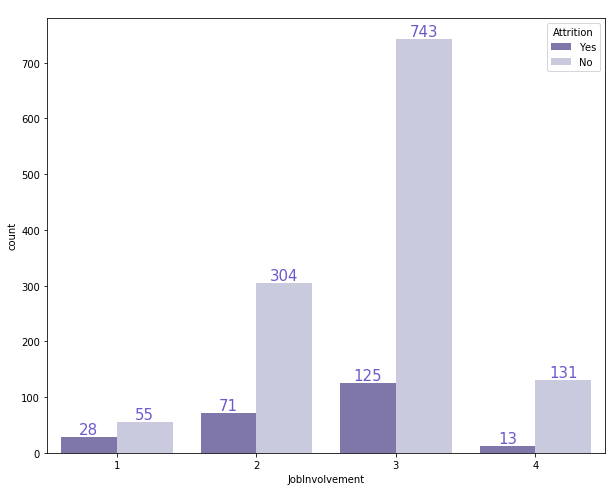

In [77]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='JobInvolvement', hue='Attrition', palette="Purples_r", data=data)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='slateblue', size=15)

## How is Attrition Affected by Training Time Last Year?

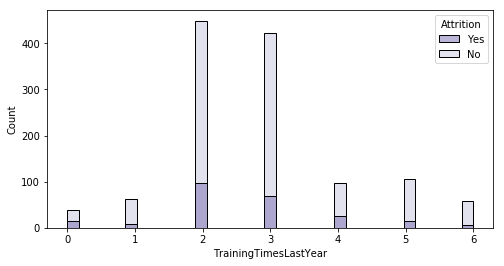

In [165]:
plt.figure(figsize=(8,4))
sns.histplot(x='TrainingTimesLastYear', palette="Purples_r", hue='Attrition', data=data)

# Is salary is one of the main reasons? Job Role, Monthly Income, and Attrition

barColor: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

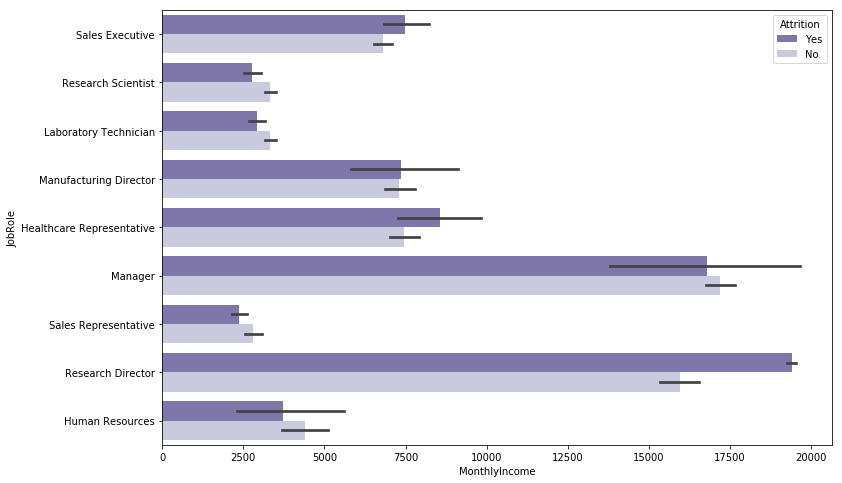

In [227]:
plt.figure(figsize=(12,8))
sns.barplot(x='MonthlyIncome', y='JobRole',palette="Purples_r", hue='Attrition', data=data)